### import all libs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:
from permamodel import examples_directory
from permamodel.components import KuFlex

In [3]:
kuflex = KuFlex()

### Case 1 - Use KuFlex_method.cfg
#### it uses combined input types, including grid, scalar, and time-series.

In [4]:
cfg_file = os.path.join(examples_directory, 'KuFlex_method.cfg')
kuflex.initialize(cfg_file)

 
KuFlex model component: Initializing...
Initialized, 0.012597999999999665 sec


In [5]:
grid_id = kuflex.get_var_grid('atmosphere_bottom_air__temperature')

print('grid id = {0}'.format(grid_id))
print('grid rank = {0}'.format(kuflex.get_grid_rank(grid_id)))
print('grid size = {0}'.format(kuflex.get_grid_size(grid_id)))
print('grid type = {0}'.format(kuflex.get_grid_type(grid_id)))

grid id = 1
grid rank = 2
grid size = 22761
grid type = uniform_rectilinear


In [6]:
shape = np.empty(kuflex.get_grid_rank(grid_id), dtype=int)
spacing = np.empty(kuflex.get_grid_rank(grid_id), dtype=float)
origin = np.empty(kuflex.get_grid_rank(grid_id), dtype=float)

print('grid_shape = {0}'.format(kuflex.get_grid_shape(grid_id, shape)))
print('grid_spacing = {0}'.format(kuflex.get_grid_spacing(grid_id, spacing)))
print('grid_origin = {0}'.format(kuflex.get_grid_origin(grid_id, origin)))

grid_shape = [ 81 281]
grid_spacing = [1. 1.]
grid_origin = [0. 0.]


Current Time = 0.0


/Users/huttone/git/permamodel/permamodel/permamodel/components/KuFlex_method.py:535: RuntimeWarning: divide by zero encountered in true_divide
  temp = 1.- np.exp(-1.*self.Hvgt*np.sqrt(np.pi/(self.Dvt*2.*self.tao2)))
/Users/huttone/git/permamodel/permamodel/permamodel/components/KuFlex_method.py:555: RuntimeWarning: invalid value encountered in arcsin
  *(Tgs/Ags*np.arcsin(Tgs/Ags)\
/Users/huttone/git/permamodel/permamodel/permamodel/components/KuFlex_method.py:612: RuntimeWarning: invalid value encountered in less_equal
  Zal[Zal <=0 ]                = 0


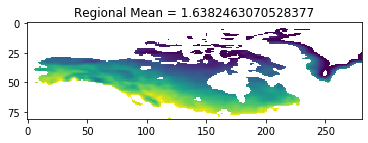

Current Time = 1.0


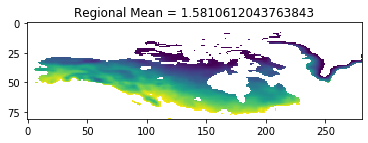

Current Time = 2.0


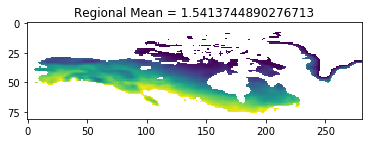

In [7]:
alt = np.empty(kuflex.get_grid_size(grid_id), dtype=float)

for i in np.arange(3):
    
    print ('Current Time = {0}'.format(kuflex.get_current_time()))
    
    kuflex.update()
    kuflex.get_value('soil__active_layer_thickness', alt)
    
    plt.imshow(alt.reshape(shape))
    plt.title('Regional Mean = {mean}'.format(mean=np.nanmean(alt)))
    plt.show()

kuflex.finalize()

#### Try use update_until function

 
KuFlex model component: Initializing...
Initialized, 0.009640999999999789 sec


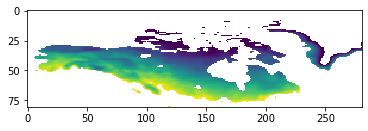

In [8]:
kuflex.initialize(cfg_file)

kuflex.update_until(2)
kuflex.get_value('soil__active_layer_thickness', alt)
plt.imshow(alt.reshape(shape))
plt.show()
kuflex.finalize()

### Case 2 - use KuFlex_method_ts to try a time-series simulation
#### It uses time-series and scalar inputs.

In [9]:
cfg_file = os.path.join(examples_directory, 'KuFlex_method_ts.cfg')
kuflex.initialize(cfg_file)

grid_id = kuflex.get_var_grid("soil__active_layer_thickness")
alt = np.empty(kuflex.get_grid_size(grid_id), dtype=float)

 
KuFlex model component: Initializing...
Initialized, 0.006336999999999815 sec


Current Time: 0.0
[0.57065867]
Current Time: 1.0
[0.50042647]
Current Time: 2.0
[0.53869501]
Current Time: 3.0
[0.43997803]
Current Time: 4.0
[0.96499688]


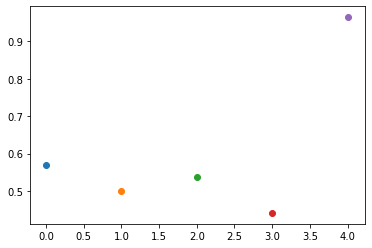

In [10]:
for i in np.arange(5):
    t0 = kuflex.get_current_time()
    kuflex.update()
    kuflex.get_value('soil__active_layer_thickness', alt)
    print('Current Time:', t0)
    print(alt)
    plt.scatter(t0, alt)
plt.show()
kuflex.finalize()

### Case 3 - All scalar inputs.

 
KuFlex model component: Initializing...
Initialized, 0.0035639999999999006 sec
Current Time = 0.0


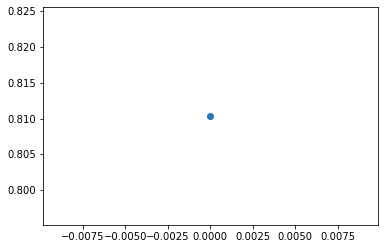

In [11]:
cfg_file = os.path.join(examples_directory, 'KuFlex_method_0d.cfg')

kuflex.initialize(cfg_file)

grid_id = kuflex.get_var_grid("soil__active_layer_thickness")
alt = np.empty(kuflex.get_grid_size(grid_id), dtype=float)

print('Current Time = {0}'.format(kuflex.get_current_time()))
t0 = kuflex.get_current_time()
kuflex.update()
kuflex.get_value('soil__active_layer_thickness', alt)
plt.scatter(t0, alt)
plt.show()
kuflex.finalize()